In [162]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
player = pd.read_csv('nba_player_file.csv')

我們選取的資料集是從 https://www.basketball-reference.com/ 利用爬蟲的方式載下來，並儲存在 nba_player_file.csv&ensp;&ensp;(2018/12/14)<br>
此次目的是要從已退休的球員來做是否進入名人堂的預測，並驗證其準確率

In [276]:
player = player.replace('-',np.nan)
player['ID'] = player.index
print(player.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 25 columns):
Name           4652 non-null object
Pos            4652 non-null int64
Active         4652 non-null int64
HoF            4652 non-null int64
All_Star       4652 non-null int64
All_Nba        4652 non-null int64
All_Def        4652 non-null int64
Score_Champ    4652 non-null int64
Assit_Champ    4652 non-null int64
Trb_Champ      4652 non-null int64
MVP            4652 non-null int64
GP             4652 non-null float64
PPG            4384 non-null object
TRPG           4628 non-null object
APG            4182 non-null object
BPG            3455 non-null object
SPG            3512 non-null object
3PG            3928 non-null object
FG%            4587 non-null object
FT%            4039 non-null object
3P%            3055 non-null object
EF%            3603 non-null object
EFF            4617 non-null object
Win_Shares     4179 non-null object
ID             4652 non-null int64
dty

<h1>資料簡介(共4652個球員曾經打過NBA)</h1>
<br>
Name
&ensp;&ensp;
球員姓名
<br>
Pos
&ensp;&ensp;
球員位置（1-5號位）
<br>
Active
&ensp;&ensp;
現役與否
<br>
HoF
&ensp;&ensp;
是否入選名人堂
<br>
All_Star
&ensp;&ensp;
入選全明星賽次數
<br>
All_Nba
&ensp;&ensp;
入選年度前三隊次數
<br>
All_Def
&ensp;&ensp;
入選年度防守隊次數
<br>
Score_Champ
&ensp;&ensp;
獲得年度得分王次數
<br>
Assit_Champ
&ensp;&ensp;
獲得年度助攻王次數
<br>
Trb_Champ
&ensp;&ensp;
獲得年度籃板王次數
<br>
MVP
&ensp;&ensp;
獲得年度ＭＶＰ次數
<br>
GP
&ensp;&ensp;
上場次數
<br>
PPG
&ensp;&ensp;
場均得分
<br>
TRPG
&ensp;&ensp;
場均籃板數
<br>
APG
&ensp;&ensp;
場均助攻數
<br>
BPG
&ensp;&ensp;
場均阻攻數
<br>
SPG
&ensp;&ensp;
場均抄截數
<br>
3PG
&ensp;&ensp;
平均每場三分球中籃數
<br>
FG%
&ensp;&ensp;
投籃命中率
<br>
FT%
&ensp;&ensp;
罰球命中率
<br>
3P%
&ensp;&ensp;
三分命中率
<br>
EF%
&ensp;&ensp;
有效命中率
<br>
EFF
&ensp;&ensp;
出場效率
<br>
Win_Shares
&ensp;&ensp;
勝利貢獻值


In [278]:
player_1 = (player[(player['Name']=='Jeremy Lin')])
print(player_1.iloc[0])

Name           Jeremy Lin
Pos                     1
Active                  1
HoF                     0
All_Star                0
All_Nba                 0
All_Def                 0
Score_Champ             0
Assit_Champ             0
Trb_Champ               0
MVP                     0
GP                    429
PPG                  11.9
TRPG                  2.8
APG                   4.4
BPG                   0.4
SPG                   1.1
3PG                   1.0
FG%                  43.6
FT%                  80.7
3P%                  35.3
EF%                  48.9
EFF                  15.6
Win_Shares           22.4
ID                   2464
Name: 2464, dtype: object


以林書豪為例，其資料如上

In [385]:
retired_players = player[player['Active']==0]
retired_players = retired_players.drop(retired_players[retired_players['Pos']==0].index)
(retired_players)


,Name,Pos,Active,HoF,All_Star,All_Nba,All_Def,Score_Champ,Assit_Champ,Trb_Champ,...,BPG,SPG,3PG,FG%,FT%,3P%,EF%,EFF,Win_Shares,ID
0,Alaa Abdelnaby,4,0,0,0,0,0,0,0,0,...,0.3,0.3,0.0,50.2,70.1,0.0,50.2,13.0,4.8,0
1,Zaid Abdul-Aziz,5,0,0,0,0,0,0,0,0,...,1.0,0.6,NaN,42.8,72.8,NaN,NaN,15.1,17.5,1
2,Kareem Abdul-Jabbar,5,0,1,19,15,11,2,0,1,...,2.6,0.9,0.0,55.9,72.1,5.6,55.9,24.6,273.4,2
3,Mahmoud Abdul-Rauf,1,0,0,0,0,0,0,0,0,...,0.1,0.8,0.8,44.2,90.5,35.4,47.2,15.4,25.2,3
4,Tariq Abdul-Wahad,2,0,0,0,0,0,0,0,0,...,0.4,0.8,0.1,41.7,70.3,23.7,42.2,11.4,3.5,4
5,Shareef Abdur-Rahim,4,0,0,1,0,0,0,0,0,...,0.8,1.0,0.2,47.2,81.0,29.7,47.9,19.0,71.2,5
6,Tom Abernethy,3,0,0,0,0,0,0,0,0,...,0.2,0.6,0.0,49.2,74.7,0.0,49.2,12.9,13.4,6
10,Alex Acker,2,0,0,0,0,0,0,0,0,...,0.1,0.2,0.3,37.0,50.0,32.0,41.3,8.5,-0.2,10
11,Don Ackerman,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,22.2,53.6,NaN,NaN,1.0,-0.6,11
12,Mark Acres,5,0,0,0,0,0,0,0,0,...,0.3,0.4,0.0,50.6,66.5,53.8,50.9,9.0,9.3,12


從資料中選取已退休的球員(Active == 0)，並把 (Pos == 0)的資料drop掉，因為其位置不明。經過篩選後一共3721名球員。

In [386]:
for column in list(retired_players.columns[retired_players.isnull().any()]):

    for i in range(1,6):
        
        condition = retired_players[(retired_players['Pos'] == i)]
        value_to_fill = (condition[column].median())
        null_index = list(condition.loc[pd.isna(condition[column]),'ID'])
        
        for k in null_index:
            
            retired_players.loc[retired_players['ID'] == k,column] =  value_to_fill
                
       

找出有缺失值的欄位，取其位置(Pos)其他非缺失值的該欄位中位數進行回填的動作

In [387]:
retired_players = retired_players.drop(columns=['Name','ID','Active'])
retired_players=retired_players.astype(np.float64)

在資料中drop掉球員名字與ID欄位

In [388]:

retired_players['TP'] = (retired_players['PPG']*retired_players['GP']).astype(int)
retired_players['TBLKS'] = (retired_players['BPG']*retired_players['GP']).astype(int)
retired_players['TA'] = (retired_players['APG']*retired_players['GP']).astype(int)
retired_players['TS'] = (retired_players['SPG']*retired_players['GP']).astype(int)
retired_players['TR'] = (retired_players['TRPG']*retired_players['GP']).astype(int)


增加其他累積數據，利用場均X出場次數
<br>
TP&ensp;&ensp;總得分
<br>
TBLKS&ensp;&ensp;總阻攻
<br>
TA&ensp;&ensp;總助攻
<br>
TR&ensp;&ensp;總籃板

In [389]:
retired_players = pd.get_dummies(retired_players, columns=['Pos'])
retired_players

,HoF,All_Star,All_Nba,All_Def,Score_Champ,Assit_Champ,Trb_Champ,MVP,GP,PPG,...,TP,TBLKS,TA,TS,TR,Pos_1.0,Pos_2.0,Pos_3.0,Pos_4.0,Pos_5.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,5.7,...,1459,76,76,76,844,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.0,9.0,...,4545,505,606,303,4040,0,0,0,0,1
2,1.0,19.0,15.0,11.0,2.0,0.0,1.0,6.0,1560.0,24.6,...,38376,4056,5616,1404,17472,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586.0,14.6,...,8555,58,2051,468,1113,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,7.8,...,1840,94,259,188,778,0,1,0,0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,830.0,18.1,...,15023,664,2075,830,6225,0,0,0,1,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.0,5.6,...,1786,63,382,191,1020,0,0,1,0,0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,2.7,...,81,3,15,6,30,0,1,0,0,0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.5,...,42,2,22,19,14,1,0,0,0,0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,3.6,...,1350,112,187,150,1537,0,0,0,0,1


對位置(Pos)取dummy variable

In [390]:
retired_label = retired_players['HoF']

retired_data = retired_players.drop(columns=['HoF'])


將HoF從retired_players分割出來作為training&testing的label

In [393]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(retired_data,retired_label,test_size=0.25,random_state=100)

把資料做成訓練集與測試集依照3:1的比例

In [452]:
print(len(X_train))
print(len(X_test))

2790
931


測試集共2790筆&ensp;&ensp;測試集共931筆

<h1>Decision_Tree</h1>

In [443]:
from sklearn.tree import DecisionTreeClassifier
tree_origin=DecisionTreeClassifier()
tree_origin.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

進行模型訓練，未加任何參數之前

In [444]:
import os
os.environ["PATH"] += os.pathsep + 'D:/release/bin/'

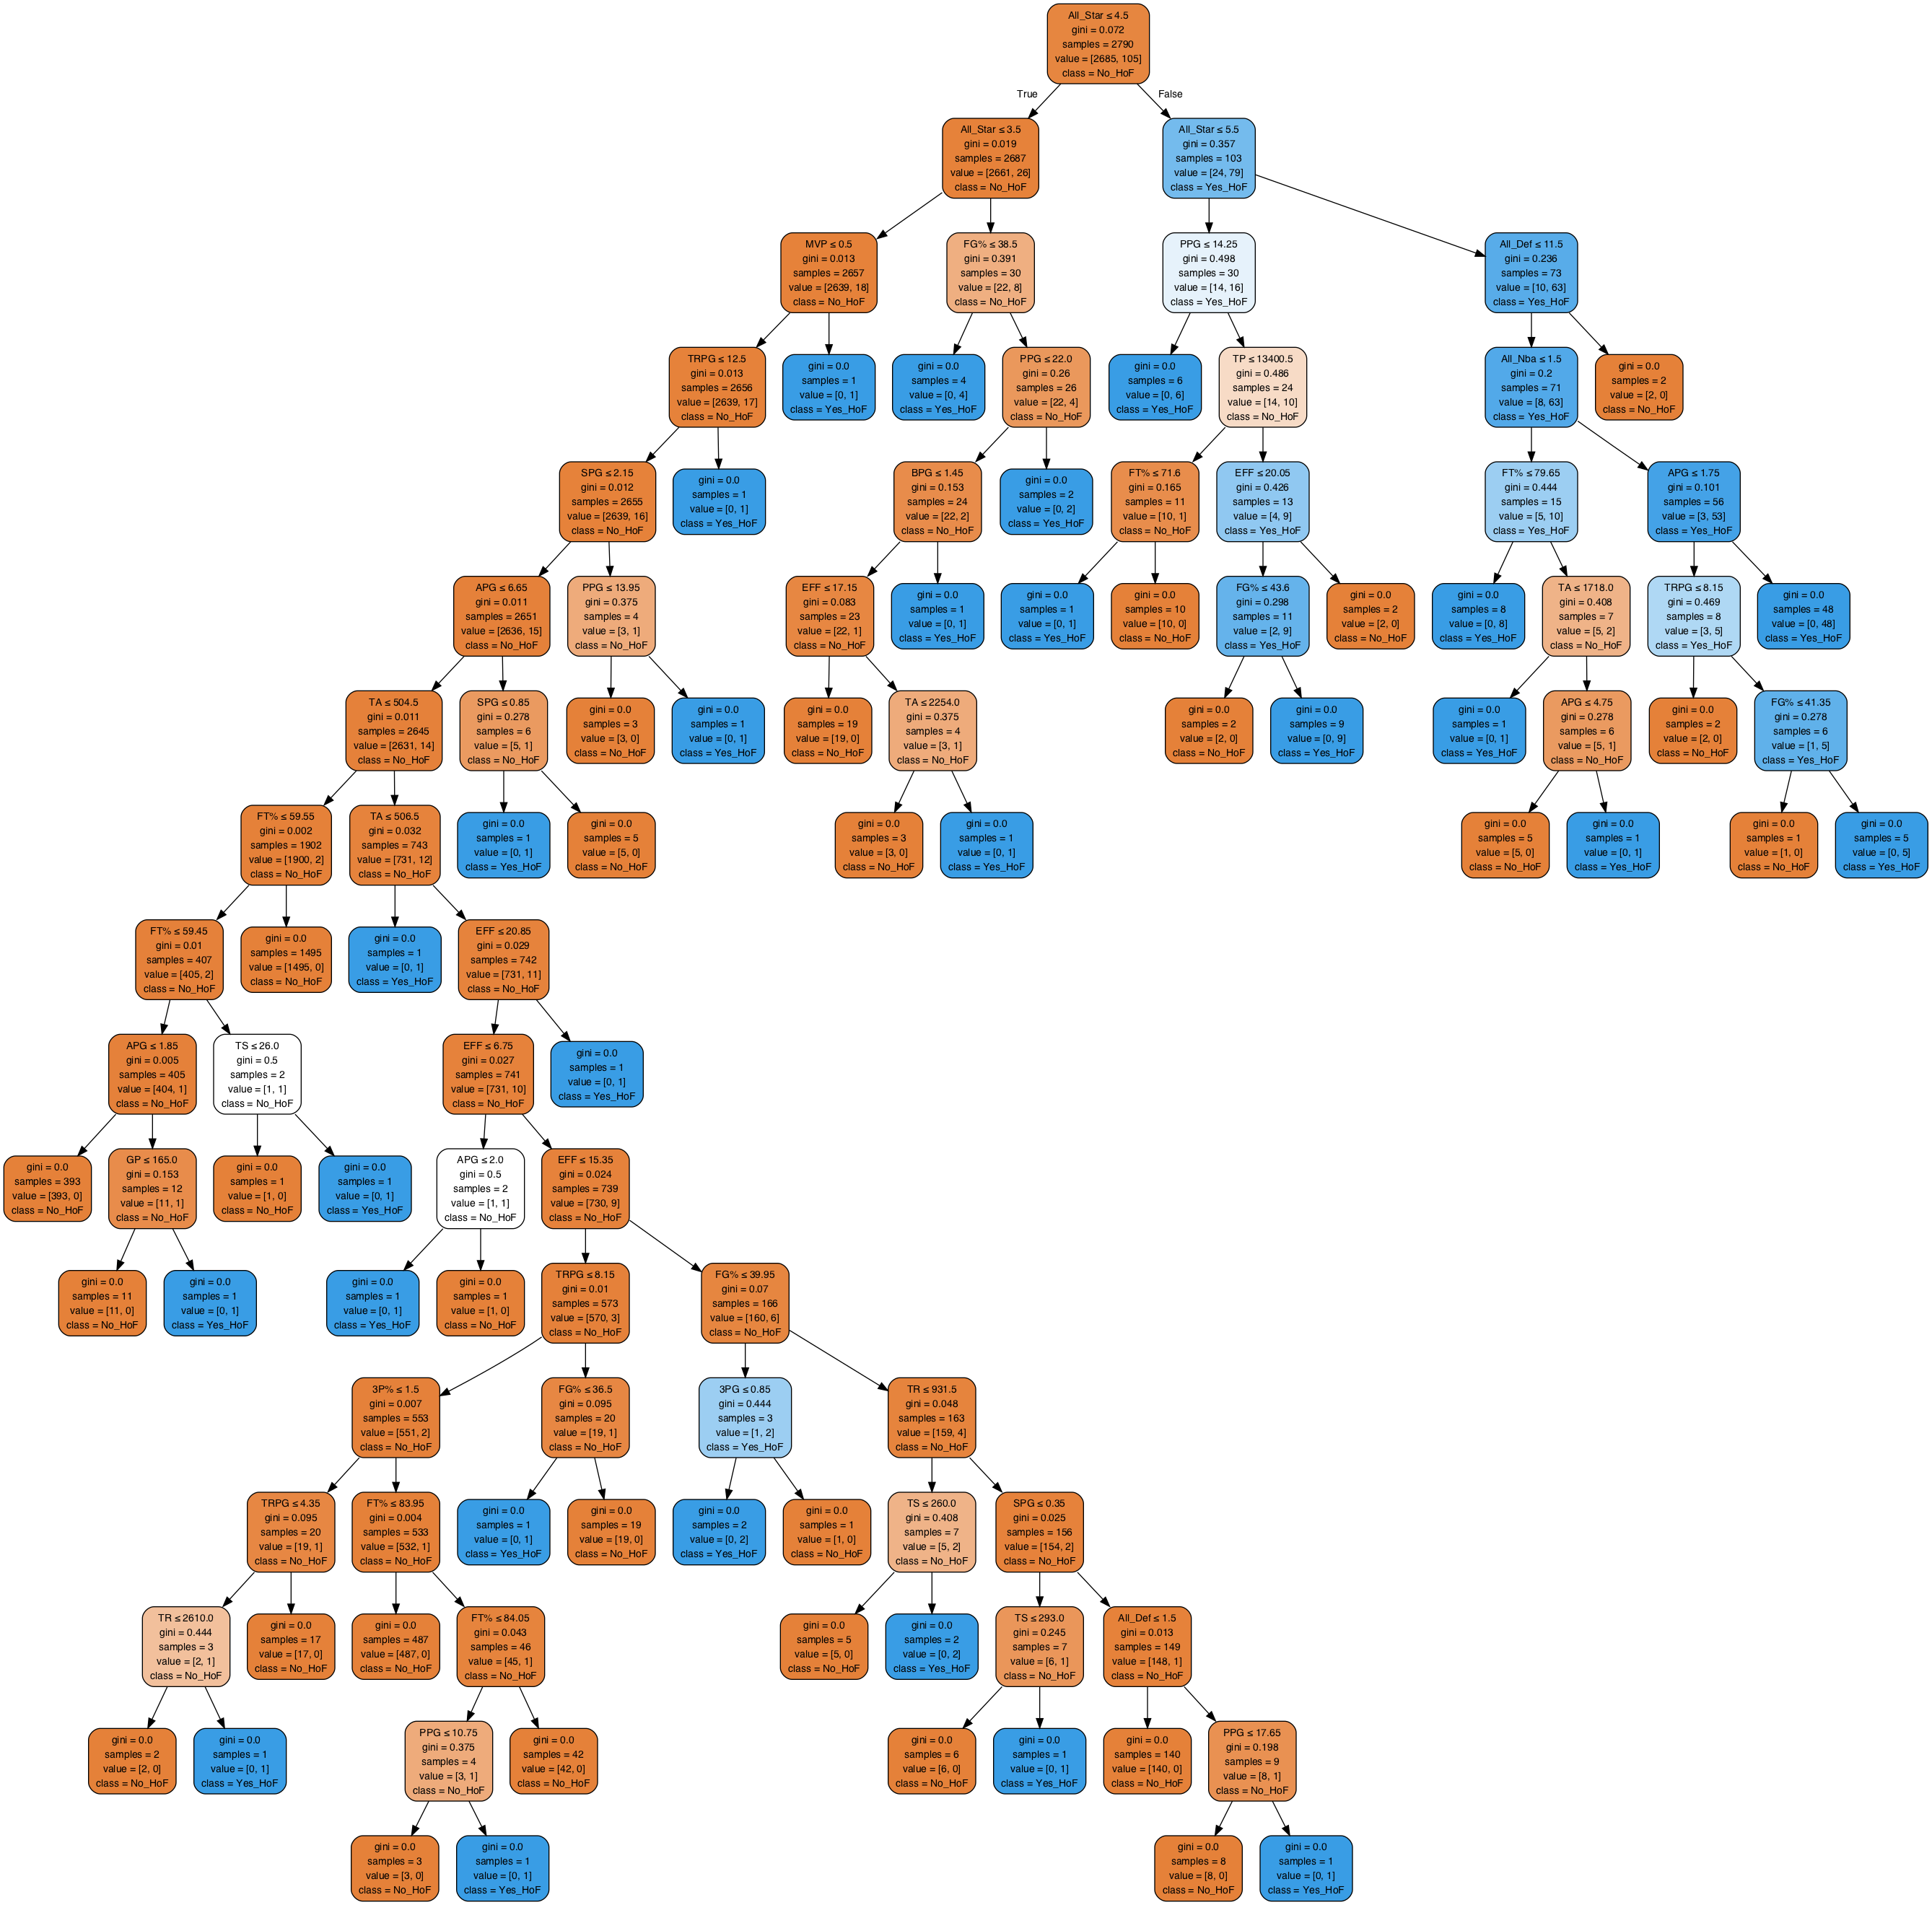

In [666]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X_train.columns
dot_data = StringIO()
export_graphviz(tree_origin, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=["No_HoF",'Yes_HoF'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('Origin_Tree.png')
Image(graph.create_png())

這邊可以看到這棵未經修剪的決策樹是利用gini係數來作為分類的依據<br>
不過由於沒有限制樹的深度，所以可能會造成overfitting的問題

In [448]:
y_pred = tree_origin.predict(X_test)

In [451]:
from sklearn import metrics 
from sklearn import preprocessing
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9699248120300752


In [459]:
new_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
new_tree = new_tree.fit(X_train,Y_train)


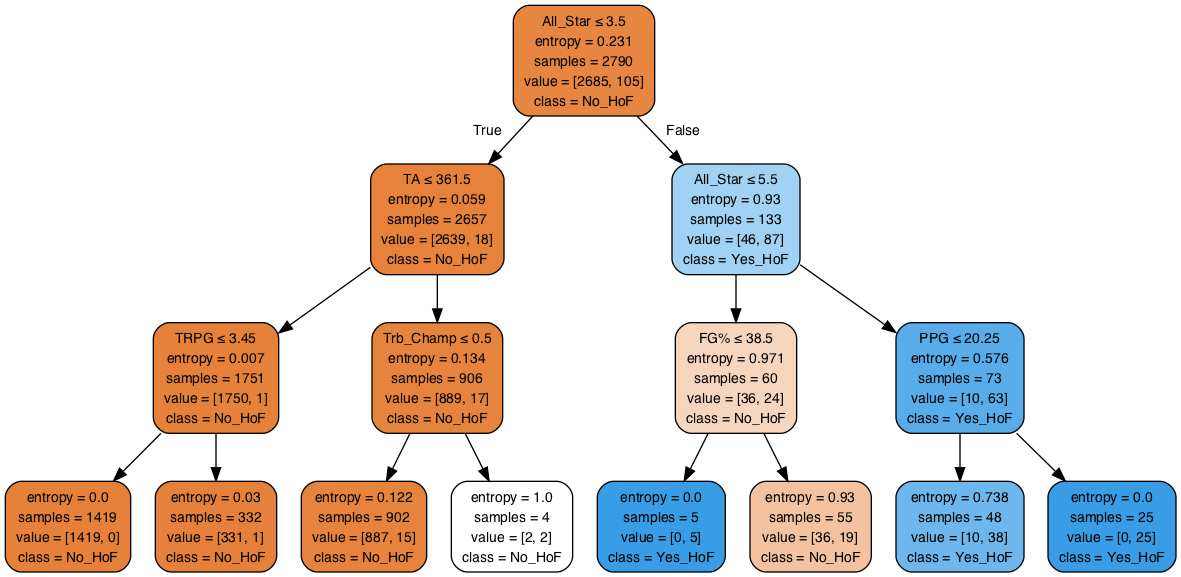

In [667]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X_train.columns
dot_data = StringIO()
export_graphviz(new_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=["No_HoF",'Yes_HoF'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('New_Tree.png')
Image(graph.create_png())

這次的模型是採用entropy來作為分類的依據<br>
可以看出進入名人堂的條件著重於入選明星賽的次數(4次以上)與場均得分(20分以上)

In [461]:
y_pred = new_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9720730397422127


修剪後的決策樹有稍微提升準確率

<h1>Logistic_Regression</h1>

In [648]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)

Y_pred=logreg.predict(X_test)

這邊使用logistic regression 的模型

In [649]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[892,   5],
       [ 16,  18]])

根據模型預測的結果與測試集做confusion matrix

Text(0.5,1.2,'Confusion matrix')

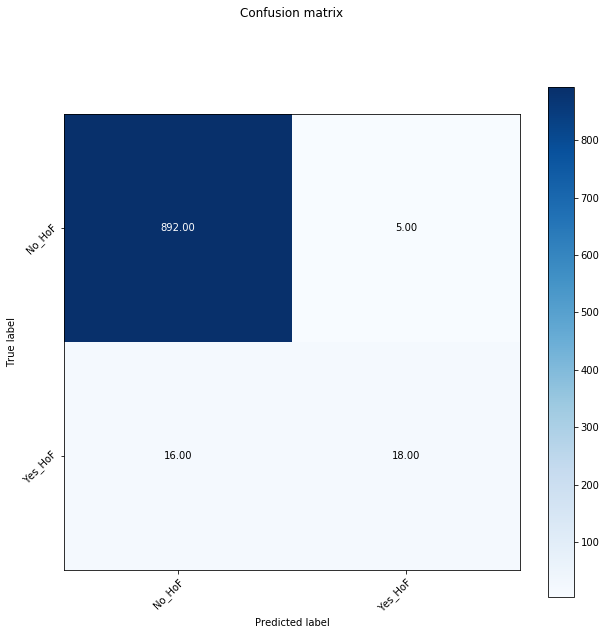

In [650]:
class_name=['No_HoF','Yes_HoF'] 
tick_marks = np.arange(len(class_names))




cm = confusion_matrix
fig, ax = plt.subplots()

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=tick_marks,
           yticks=tick_marks,
           xticklabels=class_name, yticklabels=class_name,
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.title('Confusion matrix', y=1.2)

從confusion matrix 可以看出每個類別的數量的差異<br>
在這裡我們發現到測試集裡大部分的退役球員皆不是名人堂的一員，總共多達897位，相反地入選的只有34位<br>
雖然大部分非名人堂的球員都有被正確預測出來，但是針對是名人堂成員的預測就不是很準確<br>
因為比例尺的問題使得這張圖的顏色區塊無法很有效地顯示出來，所以進行以下的修正

Text(0.5,1.2,'Confusion matrix')

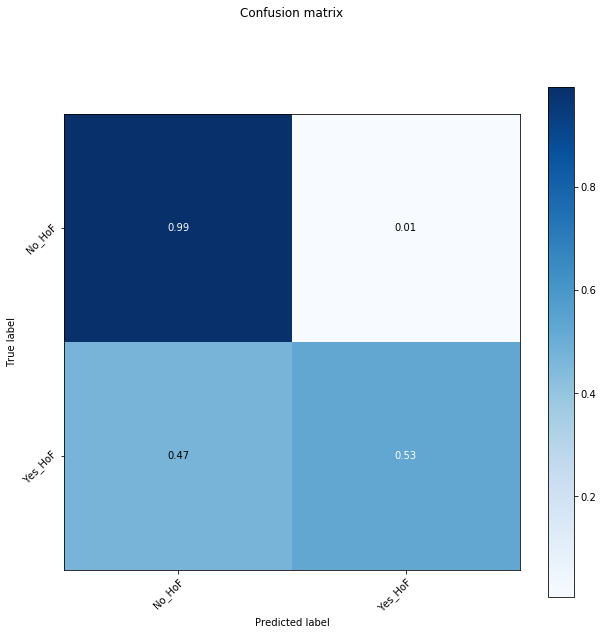

In [661]:

fig, ax = plt.subplots()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=tick_marks,
           yticks=tick_marks,
           xticklabels=class_name, yticklabels=class_name,
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.title('Confusion matrix', y=1.2)

在這張圖裡，我們進行正規化的動作，可以一目瞭然的看到預測不足之處，對於名人堂的球員的預測有接近一半是預測錯誤的

In [663]:
from sklearn.metrics import average_precision_score,recall_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

precision = 18/(5+18)
print("Precision:",precision)

recall = 18/(16+18)
print("Recall",recall)


Accuracy: 0.9774436090225563
Precision: 0.782608695652174
Recall 0.5294117647058824


模型的accuracy看似很高，如果細看來看的話，其實performance並不太好<br>
Precision:對於預測出是名人堂而實際上是名人堂的機率大概是78%<br>
Recall:對於是名人堂的球員，而預測結果能找出他們的機率大概是52%<br>


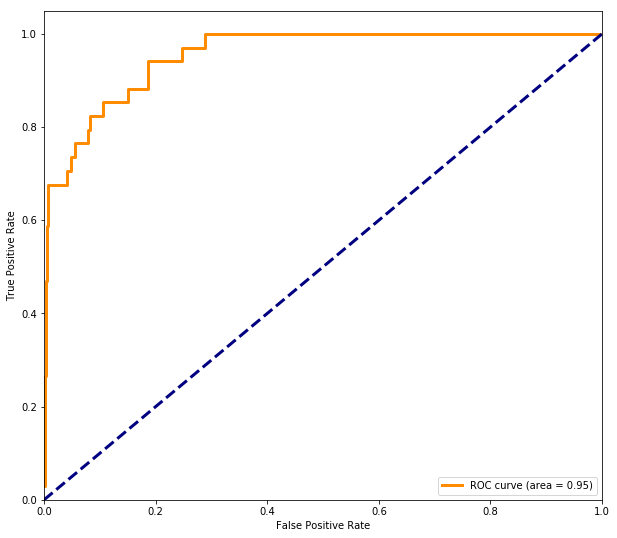

In [664]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

probs = logreg.predict_proba(X_test)
probs = probs[:, 1]
fpr,tpr,threshold = roc_curve(Y_test, probs)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 3
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

縱使對於是名人堂成員預測失準，但由於資料非常unbalanced(非名人堂的球員的比例遠遠大過名人堂的球員)<br>
ROC曲線被模型對於非名人堂的球員預測有巨大的影響，因此AUC的面積仍是相當地高。從此可知ROC曲線可能比較適合分析balanced的資料